In [10]:
import numpy as np
import pandas as pd
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
stocks = input("Enter the code of the stock: ")
data = yf.download(stocks, "2015-01-01", "2025-12-01", auto_adjust= True)
data.head()

Enter the code of the stock:  AMZN


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AMZN,AMZN,AMZN,AMZN,AMZN
Date,,,,,
2015-01-02,15.4260,15.7375,15.3480,15.6290,55664000
2015-01-05,15.1095,15.4190,15.0425,15.3505,55484000
2015-01-06,14.7645,15.1500,14.6190,15.1120,70380000
2015-01-07,14.9210,15.0640,14.7665,14.8750,52806000
2015-01-08,15.0230,15.1570,14.8055,15.0160,61768000


In [12]:
data.shape
data.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2744 entries, 2015-01-02 to 2025-11-28
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AMZN)   2744 non-null   float64
 1   (High, AMZN)    2744 non-null   float64
 2   (Low, AMZN)     2744 non-null   float64
 3   (Open, AMZN)    2744 non-null   float64
 4   (Volume, AMZN)  2744 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 128.6 KB


In [13]:
#cannot use high and low of the day to predict the value as it will not be true prediction since we cannot knwo high and low until the day ends
data["Target"] = data["Close"].shift(-1)
data["Close_lag_1"] = data["Close"].shift(1)
data["Close_lag_5"] = data["Close"].shift(5)
data["MA_5"] = data["Close"].rolling(5).mean()
data["MA_10"] = data["Close"].rolling(10).mean()
data["Return"] = data["Close"].pct_change()
data["Volatility"] = data["Return"].rolling(5).std()
data = data.dropna()
FEATURES = [
    "Open",
    "Volume",
    "Close_lag_1",
    "Close_lag_5",
    "MA_5",
    "MA_10",
    "Volatility"
]

X= data[FEATURES]
y = data["Target"] 
split = int(len(data)*0.8)
X_train = X.iloc[:split]
X_test = X.iloc[split:]
y_train = y.iloc[:split]
y_test = y.iloc[split:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2187, 7)
(547, 7)
(2187,)
(547,)


In [14]:
from sklearn.linear_model import LinearRegression 
lr = LinearRegression()
lr.fit(X_train, y_train)
pred1 = lr.predict(X_test)

In [15]:
pred1[0]

129.52809110873633

In [16]:
print(y_test)

Date
2023-09-25    125.980003
2023-09-26    125.980003
2023-09-27    125.980003
2023-09-28    127.120003
2023-09-29    129.460007
                 ...    
2025-11-20    220.690002
2025-11-21    226.279999
2025-11-24    229.669998
2025-11-25    229.160004
2025-11-26    233.220001
Name: Target, Length: 547, dtype: float64


In [17]:
from sklearn.metrics import mean_squared_error, r2_score

def calculate_metrics(y_test, pred): 
    mse = mean_squared_error(y_test, pred)
    rmse = np.sqrt(mse)
    r2_sc = r2_score(y_test, pred)
    print("Mean Squared Error: ", mse)
    print("Root Mean Squared Error: ", rmse)
    print("R2 Score: ", r2_sc)

calculate_metrics(y_test, pred1)

Mean Squared Error:  19.446836758739384
Root Mean Squared Error:  4.409856773041431
R2 Score:  0.9782427544058454


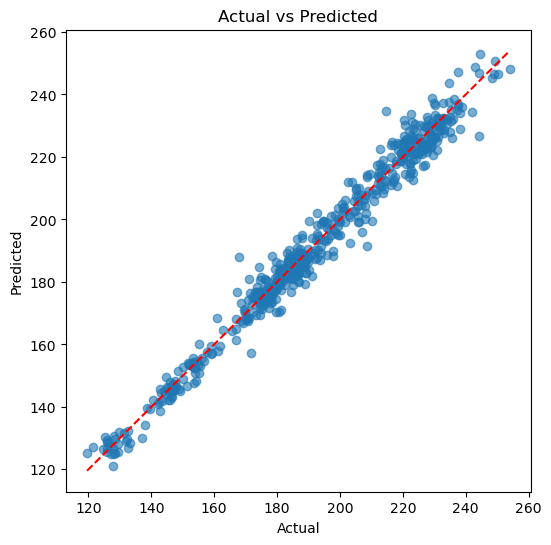

In [18]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, pred1, alpha=0.6)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()

In [19]:
import joblib 
joblib.dump(lr, "AMZN.pkl")
model = joblib.load("AMZN.pkl")